In [1]:
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')
df.shape

(107, 12)

In [3]:
df2 = pd.read_csv('test_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')
df2.shape

(47, 2)

In [4]:
df3 = pd.read_csv('dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8')
df3.shape

(35, 12)

In [5]:
df3 = pd.read_csv('full_test_split.csv',delimiter=',',encoding='utf-8')
df3.head()

,Participant_ID,PHQ_Binary,PHQ_Score,Gender
0,300,0,2,1
1,301,0,3,1
2,306,0,0,0
3,308,1,22,0
4,309,1,15,1


In [6]:
dataset1 = np.array(pd.read_csv('dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
dataset2 = np.array(pd.read_csv('full_test_split.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
dataset3 = np.array(pd.read_csv('train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]


In [7]:
dataset2.shape

(47, 2)

In [8]:
dataset = np.concatenate((dataset1, np.concatenate((dataset2, dataset3))))


In [9]:
pos = []
neg = []

In [10]:
def checkPosNeg(dataset, index):
    for i in range(0, len(dataset)):
        if(dataset[i][0] == index):
            return dataset[i][1]
    return 0

In [11]:
for i in range(len(dataset)):
        if(dataset[i][1] == 1):
            neg.append(dataset[i][0])
        else:
            pos.append(dataset[i][0])
            
pos = np.array(pos)
neg = np.array(neg)

In [12]:
pos.shape, neg.shape

((133,), (56,))

In [13]:
df = pd.read_csv("300_TRANSCRIPT.csv",delimiter='\t',encoding='utf-8')
df.head()

,start_time,stop_time,speaker,value
0,36.588,39.668,Ellie,hi i'm ellie thanks for coming in today
1,39.888,43.378,Ellie,i was created to talk to people in a safe and ...
2,43.728,48.498,Ellie,think of me as a friend i don't judge i can't ...
3,49.188,52.388,Ellie,i'm here to learn about people and would love ...
4,52.658,58.958,Ellie,i'll ask a few questions to get us started and...


In [14]:
Data = []
Y = []
Data_test = []
Y_test = []
index = -1
for i in range(0, len(dataset3)):
    val = checkPosNeg(dataset, dataset3[i][0])
    Y.append(val)
    fileName = str(int(dataset3[i][0])) + "_TRANSCRIPT.csv"
    Data.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8'))[:, 2:4])

Y_val = []
Data_val = []
for i in range(0, len(dataset1)):
    val = checkPosNeg(dataset, dataset1[i][0])
    Y_val.append(val)
    fileName = str(int(dataset1[i][0])) + "_TRANSCRIPT.csv"
    Data_val.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8'))[:, 2:4])


In [15]:
for i in range(0, len(dataset2)):
    Y_test.append(checkPosNeg(dataset, dataset2[i][0]))
    fileName = str(int(dataset2[i][0])) + "_TRANSCRIPT.csv"
    Data_test.append(np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8'))[:, 2:4])


In [16]:
Y = np.array(Y)
Data2 = []
Data2_val = []
Data2_test = []
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

In [17]:
np.unique(Y_test, return_counts = True), np.unique(Y, return_counts = True), np.unique(Y_val, return_counts = True)

((array([0., 1.]), array([33, 14])),
 (array([0., 1.]), array([77, 30])),
 (array([0., 1.]), array([23, 12])))

In [18]:
for i in range(0, len(Data)):
    script = []
    for k in range(1, len(Data[i])):
        if(Data[i][k][0] == "Participant"):
            script.append(Data[i][k][1])
    Data2.append(script)
    
for i in range(0, len(Data_test)):
    script = []
    for k in range(1, len(Data_test[i])):
        if(Data_test[i][k][0] == "Participant"):
            script.append(Data_test[i][k][1])
    Data2_test.append(script)

for i in range(0, len(Data_val)):
    script = []
    for k in range(1, len(Data_val[i])):
        if(Data_val[i][k][0] == "Participant"):
            script.append(Data_val[i][k][1])
    Data2_val.append(script)
        
Data2 = np.array(Data2)
Data2_test = np.array(Data2_test)
Data2_val = np.array(Data2_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Limpieza

In [19]:
# %run preprocessing.ipynb


In [20]:
def stop_words_and_lemmatizer(text):
    """ Remove Stop words from text """
    stopwords = nltk.corpus.stopwords.words('english')
    # stopwords.append('https')
    # stopwords.append('com')
    # stopwords.append('http')
    # stopwords.append('twitter')
    stopwords.append('m')
    stopwords.append('yes')
    stopwords.append('uh')
    stopwords.append('eh')
    
    stop_words = set(stopwords)
    
    word_tokens = nltk.word_tokenize(text) 
    
    without_stopwords = [w for w in word_tokens if not w in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    
    lemmatized = [lemmatizer.lemmatize(word) for word in without_stopwords]
    
    return ' '.join(lemmatized)

In [21]:
def to_lower(text):
    return text.lower()

In [22]:
def remove_context_symbol(text):
    import re
    return re.sub('<[^>]+>', '', text)

In [23]:
def remove_bad_symbols(text):
    """Remove unwanted symbols from text"""
    bad_symbols = re.compile('[^0-9a-z #+_]')
    return bad_symbols.sub(' ', text)

In [24]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')  
    return text

In [25]:
def expand_contractions(text):
    """ Replace contractions in the english language by the complete phrase"""
    # Contraction list
    contractions = {
      "ain't": "am not",
      "aren't": "are not",
      "can't": "cannot",
      "can't've": "cannot have",
      "'cause": "because",
      "could've": "could have",
      "couldn't": "could not",
      "couldn't've": "could not have",
      "didn't": "did not",
      "doesn't": "does not",
      "don't": "do not",
      "hadn't": "had not",
      "hadn't've": "had not have",
      "hasn't": "has not",
      "haven't": "have not",
      "he'd": "he would",
      "he'd've": "he would have",
      "he'll": "he will",
      "he'll've": "he will have",
      "he's": "he is",
      "how'd": "how did",
      "how'd'y": "how do you",
      "how'll": "how will",
      "how's": "how is",
      "I'd": "I would",
      "I'd've": "I would have",
      "I'll": "I will",
      "I'll've": "I will have",
      "I'm": "I am",
      "I've": "I have",
      "isn't": "is not",
      "it'd": "it had",
      "it'd've": "it would have",
      "it'll": "it will",
      "it'll've": "it will have",
      "it's": "it is",
      "let's": "let us",
      "ma'am": "madam",
      "mayn't": "may not",
      "might've": "might have",
      "mightn't": "might not",
      "mightn't've": "might not have",
      "must've": "must have",
      "mustn't": "must not",
      "mustn't've": "must not have",
      "needn't": "need not",
      "needn't've": "need not have",
      "o'clock": "of the clock",
      "oughtn't": "ought not",
      "oughtn't've": "ought not have",
      "shan't": "shall not",
      "sha'n't": "shall not",
      "shan't've": "shall not have",
      "she'd": "she would",
      "she'd've": "she would have",
      "she'll": "she will",
      "she'll've": "she will have",
      "she's": "she is",
      "should've": "should have",
      "shouldn't": "should not",
      "shouldn't've": "should not have",
      "so've": "so have",
      "so's": "so is",
      "that'd": "that would",
      "that'd've": "that would have",
      "that's": "that is",
      "there'd": "there had",
      "there'd've": "there would have",
      "there's": "there is",
      "they'd": "they would",
      "they'd've": "they would have",
      "they'll": "they will",
      "they'll've": "they will have",
      "they're": "they are",
      "they've": "they have",
      "to've": "to have",
      "wasn't": "was not",
      "we'd": "we had",
      "we'd've": "we would have",
      "we'll": "we will",
      "we'll've": "we will have",
      "we're": "we are",
      "we've": "we have",
      "weren't": "were not",
      "what'll": "what will",
      "what'll've": "what will have",
      "what're": "what are",
      "what's": "what is",
      "what've": "what have",
      "when's": "when is",
      "when've": "when have",
      "where'd": "where did",
      "where's": "where is",
      "where've": "where have",
      "who'll": "who will",
      "who'll've": "who will have",
      "who's": "who is",
      "who've": "who have",
      "why's": "why is",
      "why've": "why have",
      "will've": "will have",
      "won't": "will not",
      "won't've": "will not have",
      "would've": "would have",
      "wouldn't": "would not",
      "wouldn't've": "would not have",
      "y'all": "you all",
      "y'alls": "you alls",
      "y'all'd": "you all would",
      "y'all'd've": "you all would have",
      "y'all're": "you all are",
      "y'all've": "you all have",
      "you'd": "you had",
      "you'd've": "you would have",
      "you'll": "you will",
      "you'll've": "you will have",
      "you're": "you are",
      "you've": "you have"}
    
    contractions = dict((k.lower(), v.lower()) for k,v in contractions.items())

    c_re = re.compile('(%s)' % '|'.join(contractions.keys()))
    
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [26]:
import string 
from nltk.stem import WordNetLemmatizer

for n in range(len(Data2)):
  Data2[n] = to_lower(str(Data2[n]))
  Data2[n] = expand_contractions(str(Data2[n]))
  Data2[n] = remove_context_symbol(str(Data2[n]))
  Data2[n] = remove_bad_symbols(str(Data2[n]))
  Data2[n] = remove_punctuation(str(Data2[n]))
  Data2[n] = stop_words_and_lemmatizer(str(Data2[n]))

In [27]:
for n in range(len(Data2_test)):
  Data2_test[n] = to_lower(str(Data2_test[n]))
  Data2_test[n] = expand_contractions(str(Data2_test[n]))
  Data2_test[n] = remove_context_symbol(str(Data2_test[n]))
  Data2_test[n] = remove_bad_symbols(str(Data2_test[n]))
  Data2_test[n] = remove_punctuation(str(Data2_test[n]))
  Data2_test[n] = stop_words_and_lemmatizer(str(Data2_test[n]))

In [28]:
for n in range(len(Data2_val)):
  Data2_val[n] = to_lower(str(Data2_val[n]))
  Data2_val[n] = expand_contractions(str(Data2_val[n]))
  Data2_val[n] = remove_context_symbol(str(Data2_val[n]))
  Data2_val[n] = remove_bad_symbols(str(Data2_val[n]))
  Data2_val[n] = remove_punctuation(str(Data2_val[n]))
  Data2_val[n] = stop_words_and_lemmatizer(str(Data2_val[n]))

In [82]:
X_test = Data2_test
X = Data2
X_val = Data2_val

Tokenizar

In [30]:
Data2.shape

(107,)

In [85]:
type(X)

numpy.ndarray

In [31]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Y = lb.fit_transform(Y)
Y_val = lb.transform(Y_val)
Y_test = lb.transform(Y_test)

In [32]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=500, split=' ') 


tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, value=-1000, dtype='float64')


#tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = X.shape[1], value=-1000, dtype='float64')



#tokenizer.fit_on_texts(X_val)
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen = X.shape[1], value=-1000, dtype='float64')




In [33]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))


In [34]:
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 5175


In [35]:
X.shape

(107, 1, 1348)

In [36]:
Y.shape

(107,)

In [37]:
X.shape

(107, 1, 1348)

In [38]:
X_experimental = np.expand_dims(X ,axis = 0)

X_experimental.shape

(1, 107, 1, 1348)

In [39]:
Y = Y.astype(int)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
X[1].shape

(1, 1348)

In [41]:
# import tensorflow as tf
# train_data = tf.data.Dataset.from_tensor_slices((X,Y))

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, Dense
from keras.layers import Input
def init_model_2():
  model = Sequential()
  #input = Input(shape=(142, 1353))
  initial_learning_rate = 0.001
  lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=2000, decay_rate=0.5)
  adam = Adam(learning_rate=lr_schedule)
  model.add(layers.Masking(mask_value=-1000))
  #model.add(layers.Embedding(500, 7059, input_length = X.shape[1]))
  model.add(layers.GRU(512, return_sequences=True, activation='tanh')) #input_shape = [1, 1353]))
  model.add(layers.GRU(256, return_sequences=True, activation='tanh'))
  model.add(layers.GRU(128, return_sequences=True, activation='tanh'))
  model.add(layers.GRU(256, return_sequences=True, activation='tanh'))
  model.add(layers.GRU(128, return_sequences=True, activation='tanh', dropout= 0.03))
  model.add(layers.GRU(64, return_sequences=True, activation='tanh', dropout=0.02))
  model.add(layers.GRU(32, return_sequences=True, activation='tanh',dropout=0.01))
  model.add(layers.Flatten())
  model.add(Dense(16, activation = 'tanh'))
  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(
      optimizer=adam,
      loss="binary_crossentropy",
      metrics=['accuracy', 'AUC','Precision','Recall'])
  return model

model = init_model_2()


from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)
history_fit = model.fit(X, Y, 
          batch_size = 32,
          epochs=100,
          validation_data = (X_val, Y_val),
          #callbacks=[es],
          verbose = 1
         )

Epoch 1/100
4/4 [==============================] - 55s 4s/step - loss: 0.6808 - accuracy: 0.6449 - auc: 0.4710 - precision: 0.3333 - recall: 0.2667 - val_loss: 0.6489 - val_accuracy: 0.6571 - val_auc: 0.7391 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 69ms/step - loss: 0.6101 - accuracy: 0.7290 - auc: 0.5141 - precision: 1.0000 - recall: 0.0333 - val_loss: 0.6688 - val_accuracy: 0.6571 - val_auc: 0.7283 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 73ms/step - loss: 0.5996 - accuracy: 0.7290 - auc: 0.4543 - precision: 1.0000 - recall: 0.0333 - val_loss: 0.6908 - val_accuracy: 0.6571 - val_auc: 0.5199 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 67ms/step - loss: 0.5975 - accuracy: 0.7290 - auc: 0.3913 - precision: 1.0000 - recall: 0.0333 - val_loss: 0.6681 - val_accuracy: 0.6571 - val_auc: 0.5000 - val_

In [43]:
model.summary() #loss: 0.2482 - accuracy: 0.8972 - auc: 0.9550 - precision: 0.8800 - recall: 0.7333 - val_loss: 1.5062 - val_accuracy: 0.6000 - val_auc: 0.3098 - val_precision: 0.2500 - val_recall: 0.0833
#Epoch 100/100 4/4 [==============================] - 0s 91ms/step - loss: 0.3785 - accuracy: 0.7944 - auc: 0.9139 - precision: 0.6053 - recall: 0.7667 - val_loss: 1.5598 - val_accuracy: 0.5714 - val_auc: 0.3913 - val_precision: 0.2857 - val_recall: 0.1667

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 1, 1348)           0         
                                                                 
 gru (GRU)                   (None, 1, 512)            2860032   
                                                                 
 gru_1 (GRU)                 (None, 1, 256)            591360    
                                                                 
 gru_2 (GRU)                 (None, 1, 128)            148224    
                                                                 
 gru_3 (GRU)                 (None, 1, 256)            296448    
                                                                 
 gru_4 (GRU)                 (None, 1, 128)            148224    
                                                                 
 gru_5 (GRU)                 (None, 1, 64)             3

In [44]:
Y_pred = model.predict(X_test)

In [45]:
y_pred = [1 if value[0] >= 0.5 else 0 for value in Y_pred]

In [46]:
#np.unique(y_pred, return_counts = True) # con early stop y sin validation, y con Y como int

In [47]:
np.unique(y_pred, return_counts = True), np.unique(Y_test, return_counts = True) #array([25081,   277]))

((array([0, 1]), array([44,  3])), (array([0, 1]), array([33, 14])))

In [65]:
df = pd.read_csv('twitter_reddit_text.csv')
df['clean_text']

0        lay bed hour point back pain get work minut cl...
1            dlitedaili dont play wouldnt want anyth world
2                   rewebcoach hey handsom time get day go
3                                   get readi tenni maryyi
4        hear song band almost never play favourit radi...
                               ...                        
25363              honestli need convers post grad depress
25364       ye ye thank god u answer prayer asap owe u one
25365                         depress realli play game lol
25366    late take lot l high stress interview dream jo...
25367                 thank burghrealtor pghjen pie remend
Name: clean_text, Length: 25368, dtype: object

In [96]:
df =df.drop('11691')
lengths = df["clean_text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

KeyError: ignored

In [66]:
#text = ['Sometimes depression is not wanting to die but not having the will to live either. Losing interest on things that made you happy, staying in bed even though your stomach curls up in hunger and wanting to wake up even though you are really pressed.Bare minimum just feel like a lot']

In [89]:
text = np.array([df['clean_text'][11691]])

In [90]:
text.shape

(1,)

In [91]:
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, maxlen = 1348, value=-1000, dtype='float64')


In [92]:
text.shape

(1, 1348)

In [93]:
text = np.reshape(text, (text.shape[0], 1, text.shape[1]))

In [94]:
text.shape

(1, 1, 1348)

In [95]:
model.predict(text)

array([[0.97668266]], dtype=float32)

In [58]:
Y_test.shape

(47,)

In [59]:
np.unique(Y_test, return_counts = True), np.unique(Y, return_counts = True), np.unique(Y_val, return_counts = True)

((array([0, 1]), array([33, 14])),
 (array([0, 1]), array([77, 30])),
 (array([0, 1]), array([23, 12])))

In [60]:
# import matplotlib.pyplot as plt
# #ploteo sin earlystop ni validation
# val_acc = history_fit.history['val_accuracy']
# loss = history_fit.history['loss']
# val_loss = history_fit.history['val_loss']
# acc = history_fit.history['accuracy'] 
# epochs = range(len(acc))
 
# plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
 
# plt.figure()
 
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
 
# plt.show()

In [61]:
# import matplotlib.pyplot as plt
# #ploteo con early stop y validation
# val_acc = history_fit.history['val_accuracy']
# loss = history_fit.history['loss']
# val_loss = history_fit.history['val_loss']
# acc = history_fit.history['accuracy'] 
# epochs = range(len(acc))
 
# plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
 
# plt.figure()
 
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
 
# plt.show()

In [62]:
# import matplotlib.pyplot as plt
# #ploteo con early stop y sin validation

# val_acc = history_fit.history['val_accuracy']
# loss = history_fit.history['loss']
# val_loss = history_fit.history['val_loss']
# acc = history_fit.history['accuracy'] 
# epochs = range(len(acc))
 
# plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
 
# plt.figure()
 
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
 
# plt.show()

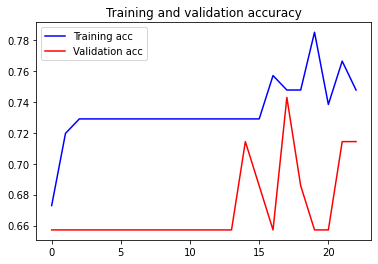

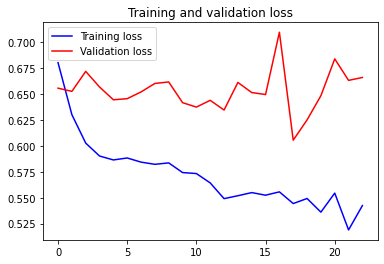

In [63]:
import matplotlib.pyplot as plt
#ploteo con early stop y sin validation, y con Y como int

val_acc = history_fit.history['val_accuracy']
loss = history_fit.history['loss']
val_loss = history_fit.history['val_loss']
acc = history_fit.history['accuracy'] 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()